In [1]:
import cv2
import matplotlib.pyplot as plt
import cython
%load_ext cython
import cython

In [2]:
%%cython -a
 
import cython
 
@cython.boundscheck(False)
cpdef unsigned char[:, :,:] scaling(unsigned char [:,:, :] output_img):
    cdef int scale=30
    for row in range(0,output_img.shape[0]):
        for column in range(0,output_img.shape[1]):
            for channel in range(0,output_img.shape[2]):
                output_img[row,column,channel]*=scale
    return output_img

In [3]:
def ela_algo(filename):
    #Load Image
    image=cv2.imread(filename)
    # Write the modified image 
    cv2.imwrite("temp.jpeg", image,[cv2.IMWRITE_JPEG_QUALITY,90])
    resaved_img = cv2.imread("temp.jpeg")
    #Split the image into channels
    orig_r,orig_g,orig_b = cv2.split(image)
    comp_r,comp_g,comp_b = cv2.split(resaved_img)
    #Find the absolute difference between the original and the compressed image
    diff_b=abs(comp_b-orig_b)
    diff_g=abs(comp_g-orig_g)
    diff_r=abs(comp_r-orig_r)
    #Merge the channels
    diff_img=cv2.merge([diff_r,diff_g,diff_b])
    #Creating another copy of the image
    return scaling(diff_img)

In [4]:
mobile_img=ela_algo("image.jpg")
photoshop_img=ela_algo("photoshop.jpg")

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


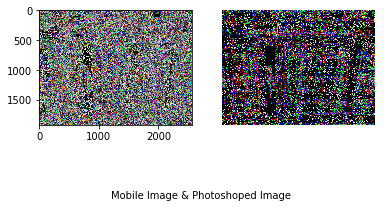

In [5]:
f = plt.figure()
f.add_subplot(1, 2, 2)
f.add_subplot(1, 2, 1)
plt.imshow(mobile_img)
f.add_subplot(1, 2, 2)
plt.imshow(photoshop_img)
f.text(.5, .05, 'Mobile Image & Photoshoped Image', ha='center')
plt.axis('off')

plt.show()